<a href="https://colab.research.google.com/github/Judenigma/Inteligencia-Artificial-UdeA/blob/main/01_exploraci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import os

In [19]:
os.environ['KAGGLE_CONFIG_DIR'] = "."

In [20]:
!kaggle competitions download -c udea-ai4eng-20241

 80% 17.0M/21.2M [00:00<00:00, 36.6MB/s]
100% 21.2M/21.2M [00:00<00:00, 43.0MB/s]


In [21]:
!unzip udea-ai4eng-20241.zip

Archive:  udea-ai4eng-20241.zip
  inflating: submission_example.csv  
  inflating: test.csv                
  inflating: train.csv               


In [22]:
!chmod 600 ./kaggle.json

In [24]:
data = pd.read_csv("train.csv")
data.head()

,ID,PERIODO,ESTU_PRGM_ACADEMICO,ESTU_PRGM_DEPARTAMENTO,ESTU_VALORMATRICULAUNIVERSIDAD,ESTU_HORASSEMANATRABAJA,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_EDUCACIONPADRE,FAMI_TIENELAVADORA,FAMI_TIENEAUTOMOVIL,ESTU_PRIVADO_LIBERTAD,ESTU_PAGOMATRICULAPROPIO,FAMI_TIENECOMPUTADOR,FAMI_TIENEINTERNET.1,FAMI_EDUCACIONMADRE,RENDIMIENTO_GLOBAL
0,904256,20212,ENFERMERIA,BOGOTÁ,Entre 5.5 millones y menos de 7 millones,Menos de 10 horas,Estrato 3,Si,Técnica o tecnológica incompleta,Si,Si,N,No,Si,Si,Postgrado,medio-alto
1,645256,20212,DERECHO,ATLANTICO,Entre 2.5 millones y menos de 4 millones,0,Estrato 3,No,Técnica o tecnológica completa,Si,No,N,No,Si,No,Técnica o tecnológica incompleta,bajo
2,308367,20203,MERCADEO Y PUBLICIDAD,BOGOTÁ,Entre 2.5 millones y menos de 4 millones,Más de 30 horas,Estrato 3,Si,Secundaria (Bachillerato) completa,Si,No,N,No,No,Si,Secundaria (Bachillerato) completa,bajo
3,470353,20195,ADMINISTRACION DE EMPRESAS,SANTANDER,Entre 4 millones y menos de 5.5 millones,0,Estrato 4,Si,No sabe,Si,No,N,No,Si,Si,Secundaria (Bachillerato) completa,alto
4,989032,20212,PSICOLOGIA,ANTIOQUIA,Entre 2.5 millones y menos de 4 millones,Entre 21 y 30 horas,Estrato 3,Si,Primaria completa,Si,Si,N,No,Si,Si,Primaria completa,medio-bajo


In [25]:
# Cuantos estudiantes de cada programa hay en cada municipio
dfresult = data[["ESTU_PRGM_DEPARTAMENTO", "ESTU_PRGM_ACADEMICO"]].value_counts()
dfresult

ESTU_PRGM_DEPARTAMENTO  ESTU_PRGM_ACADEMICO             
BOGOTÁ                  ADMINISTRACION DE EMPRESAS          21468
                        ADMINISTRACIÓN DE EMPRESAS          19639
                        DERECHO                             13051
                        PSICOLOGIA                          12668
                        PSICOLOGÍA                          12293
                                                            ...  
ANTIOQUIA               LICENCIATURA EN LENGUAS MODERNAS        1
PUTUMAYO                SALUD OCUPACIONAL                       1
CUNDINAMARCA            ADMINISTRACION PUBLICA                  1
META                    ADMINISTRACION FINANCIERA               1
CAQUETA                 ADMINISTRACION PUBLICA                  1
Length: 2370, dtype: int64

In [34]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Estudiantes CON computador y estudiantes SIN computador
fami_compu = data['FAMI_TIENECOMPUTADOR']
fami_compu.value_counts()

Si    597670
No     56727
Name: FAMI_TIENECOMPUTADOR, dtype: int64

In [32]:
# Estudiantes CON automovil y estudiantes SIN automovil
fami_auto = data['FAMI_TIENEAUTOMOVIL']
fami_auto.value_counts()

No    412606
Si    236271
Name: FAMI_TIENEAUTOMOVIL, dtype: int64

In [36]:
# Cargando GeoJson de los municipios de Colombia para posteriormente generar mapas de calor {WIP}
!kaggle datasets download -d alfredomaussa/colombia-geojson-municipios
!unzip colombia-geojson-municipios.zip
!chmod 600 ./kaggle.json
gdf = gpd.read_file('municipios_GeoJSON.geojson')

colombia-geojson-municipios.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  colombia-geojson-municipios.zip
replace municipios_GeoJSON.geojson? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [29]:
# Compara el nombre de los departamentos tanto en el geojson como en el dataset inicial
gdfdpts = gdf['dpt'].unique()
print(gdfdpts)
print(data['ESTU_PRGM_DEPARTAMENTO'].unique())
# Falta limpiar los datos para que ambas listas de departamentos queden con los mismos datos.

['LA GUAJIRA' 'MAGDALENA' 'ATLANTICO' 'CESAR' 'BOLIVAR' 'SUCRE' 'CORDOBA'
 'NORTE DE SANTANDER' 'ANTIOQUIA' 'CHOCO' 'SANTANDER' 'ARAUCA' 'BOYACA'
 'VICHADA' 'CASANARE' 'CUNDINAMARCA' 'CALDAS' 'RISARALDA' 'TOLIMA'
 'VALLE DEL CAUCA' 'META' 'SANTAFE DE BOGOTA D.C' 'QUINDIO' 'GUAINIA'
 'HUILA' 'CAUCA' 'CAQUETA' 'GUAVIARE' 'NARI�O' 'VAUPES' 'PUTUMAYO'
 'AMAZONAS' 'ARCHIPIELAGO DE SAN ANDRES PROVIDENCIA Y SANTA CATALINA']
['BOGOTÁ' 'ATLANTICO' 'SANTANDER' 'ANTIOQUIA' 'HUILA' 'SUCRE' 'CAQUETA'
 'CUNDINAMARCA' 'BOLIVAR' 'TOLIMA' 'VALLE' 'QUINDIO' 'RISARALDA' 'CORDOBA'
 'META' 'LA GUAJIRA' 'BOYACA' 'NARIÑO' 'CAUCA' 'NORTE SANTANDER' 'CESAR'
 'PUTUMAYO' 'CALDAS' 'MAGDALENA' 'CHOCO' 'CASANARE' 'ARAUCA' 'GUAVIARE'
 'AMAZONAS' 'VAUPES' 'SAN ANDRES']


<Axes: title={'center': 'Densidad de estudiantes por departamento'}, xlabel='Longitud', ylabel='Latitud'>

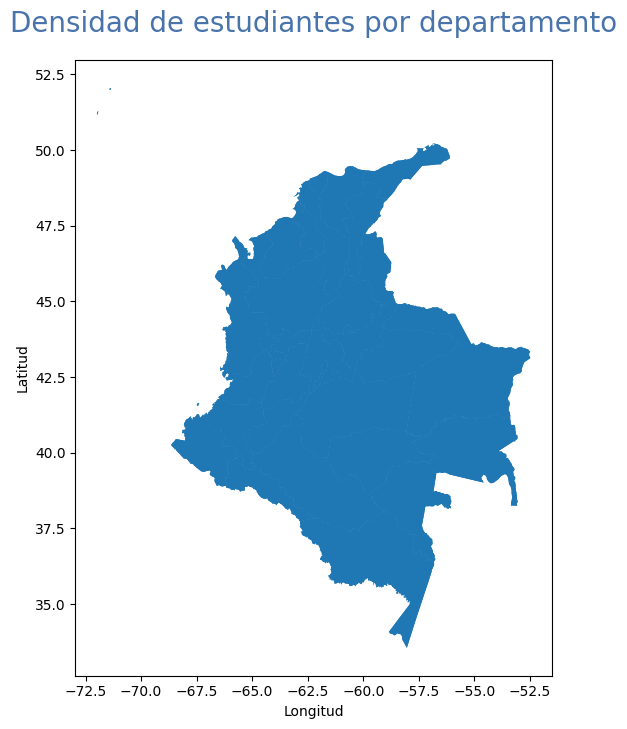

In [37]:
ig, ax = plt.subplots(figsize=(10,8))
ax.set_title('Densidad de estudiantes por departamento', pad=20, fontdict={'fontsize': 20, 'color': '#4873ab'})
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

gdf.plot(ax = ax)
# Aún falta filtrar agregarle el mapa de calor a cada departamento para que se muestre en el mapa.

In [38]:
# Estudiantes de cada programa por municipio.
ecp_result= data[["ESTU_PRGM_DEPARTAMENTO", "ESTU_PRGM_ACADEMICO"]].value_counts()
ecp_result
print(ecp_result.value_counts())

1      62
3      29
2      27
5      26
7      21
       ..
585     1
583     1
573     1
571     1
346     1
Length: 638, dtype: int64


In [44]:
# Valor de la matricula por departamento.
value_counts= data[(["ESTU_PRGM_DEPARTAMENTO", "ESTU_VALORMATRICULAUNIVERSIDAD"])]
print(value_counts)

       ESTU_PRGM_DEPARTAMENTO            ESTU_VALORMATRICULAUNIVERSIDAD
0                      BOGOTÁ  Entre 5.5 millones y menos de 7 millones
1                   ATLANTICO  Entre 2.5 millones y menos de 4 millones
2                      BOGOTÁ  Entre 2.5 millones y menos de 4 millones
3                   SANTANDER  Entre 4 millones y menos de 5.5 millones
4                   ANTIOQUIA  Entre 2.5 millones y menos de 4 millones
...                       ...                                       ...
692495             LA GUAJIRA         Entre 500 mil y menos de 1 millón
692496        NORTE SANTANDER  Entre 2.5 millones y menos de 4 millones
692497                 BOGOTÁ    Entre 1 millón y menos de 2.5 millones
692498                 TOLIMA  Entre 2.5 millones y menos de 4 millones
692499              ANTIOQUIA  Entre 5.5 millones y menos de 7 millones

[692500 rows x 2 columns]
